# PA 2: Classification - Support Vector Machine

## Student Details
Student Name and ID:Diksha Sharma 1001679176

Notes: When submitting, fill your name and ID in this cell.[1 point]

Do not to forget to cite any external sources used by you.

## Programming Assignment Submission Instructions

Step 5: Rename this submission file as 'yourLastName_Last4digitsofyourID_SVM.ipynb'. [1 point]

Step 6: Place this file inside the folder 'PA#2_Classification_yourLastName_Option2' [1 point]

## Programming Assignment Details

Do not forget, this is an individual assignment!

For this assignment use Jupyter notebook, Panda, and scikit.

- Load wine dataset from sklearn datasets. [0 points]
- Split your dataset 70% for training, and 30% for testing the classifier. [0 points]
- Select only 2 attributes for training and testing your model. [2 points]
- Use One-vs-One method. [1 points]
- Try with a linear, and non-linear kernel polynomial=3 and Gaussian RBF. [6 points]
- Use comments to explain your code and variable names.[2 points]
- Calculate and print the confusion matrix, and the classification Report (includes: precision, recall, f1-score, and support) for linear and non-linear kernels. [6 points]
- Plot the classifier in a 2D projection for linear and non-linear kernels. [3 points]

## Report

For each classification task you need to submit a report (Microsoft Word, or PDF) that you have to:
- describe SVM method, [3 points]
- What is a support vector? [3 points]
- What is the difference between One-vs-One and One-vs-All method? [3 points]
- explain what was your criteria for selecting the two attributes, [4 points]
- Visualize SVM in a 2D projection for linear, and non-linear kernels. [6 points]
- Interprete and compare the results. [6 points]

Do not to forget to cite your sources!


Step 7: Save your report file as 'yourLastName_Last4digitsofyourID_SVM.doc' [1 point]

Step 8: Place this file inside the folder 'PA#2_Classification_yourLastName_Option2' [1 point]

Step 9: Submit your zipped folder (PA#2_Classification_yourLastName_Option2.zip) on Blackboard

# - - - - - - - - - - - - - - - Solution - - - - - - - - - - - - - - - - - - 

In [1]:
#---------------IMPORTING THE LIBRARIES REQUIRED FOR SVM METHOD EXECUTION-------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from mlxtend.plotting import plot_decision_regions

In [2]:
#-----LOADING THE DATASET----
wine_data=load_wine()
#---CONVERTING THE BUNCH DATASET INTO A DATAFRAME FOR TRAINING AND TESTING THE DATA
wine_df=pd.DataFrame(data=wine_data.data,columns=wine_data.feature_names)
wine_df['target']=wine_data.target
wine_df['class']=wine_df['target'].map(lambda index: wine_data['target_names'][index])
#-----KEEPING THE X_train DATA EXCLUDING THE TARGET AND CLASS FEATURE NAMES-----
X=wine_df.drop(['target','class'],axis=1)
#-----ASSIGNING y_train as the target values------
y=wine_df['target']
#-----TRAINING AND TESTING THE DATA IN A RATIO OF 70 TO 30,SPECIFYING THE TEST SIZE AS 30%==0.3-----
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)

In [3]:
#-----------SELECTING BEST 2 ATTRIBUTES FOR TRAINING AND TESTING THE MODEL-----------
#-----USE chi2 TEST TO SELECT THE TWO ATTRIBUTES USING k=2-----
chi_test = SelectKBest(chi2, k=2)
#-----TRAINING THE MODEL TO LEARN------
chi_test.fit(X_train,y_train)
#------FINDING THE TWO BEST ATTRIBUTES-------
best_2_attr = chi_test.get_support(indices = True)
selected_attr = [wine_df.columns[att] for att in best_2_attr]
#-----CHOOSING THE TWO ATTRIBUTES FOR TRAINING AND TESTONG THE MODEL-----
X_train=X_train[selected_attr]
X_test = X_test[selected_attr]

In [4]:
#-------USE LINEAR KERNEL------
#-----one vs one classifier-----
svm_linear=svm.SVC(kernel='linear',decision_function_shape='ovo') 
svm_linear.fit(X_train,y_train)
linear_prediction=svm_linear.predict(X_test)
#----confusion matrix using the tested and the predicted values-----
cm=confusion_matrix(y_test,linear_prediction)
print("Confusion Matrix for linear kernel is as follows:\n\n",cm)
cl_report=classification_report(y_test,linear_prediction)
print("\n\n")
print("Classification Report for linear kernel is as follows:\n\n",cl_report)


Confusion Matrix for linear kernel is as follows:

 [[12  0  0]
 [ 0 24  0]
 [ 1  4 13]]



Classification Report for linear kernel is as follows:

              precision    recall  f1-score   support

          0       0.92      1.00      0.96        12
          1       0.86      1.00      0.92        24
          2       1.00      0.72      0.84        18

avg / total       0.92      0.91      0.90        54



In [5]:
svm_poly=svm.SVC(C=0.5,kernel="poly",degree=3,gamma=0.001,decision_function_shape='ovo')
svm_poly.fit(X_train,y_train)
poly_prediction=svm_poly.predict(X_test)
#----confusion matrix using the tested and the predicted values-----
cm=confusion_matrix(y_test,poly_prediction)
print("Confusion Matrix for polynomial kernel is as follows:\n\n",cm)
print("\n\n")
#----confusion matrix using the tested and the predicted values-----
cl_report=classification_report(y_test,poly_prediction)
print("Classification Report for polynomial kernel is\n\n",cl_report)

Confusion Matrix for polynomial kernel is as follows:

 [[12  0  0]
 [ 0 24  0]
 [ 2  2 14]]



Classification Report for polynomial kernel is

              precision    recall  f1-score   support

          0       0.86      1.00      0.92        12
          1       0.92      1.00      0.96        24
          2       1.00      0.78      0.88        18

avg / total       0.93      0.93      0.92        54



In [6]:
#------USE RBF KERNEL------
svm_rbf=svm.SVC(kernel='rbf',gamma=.0001,decision_function_shape='ovo')
svm_rbf.fit(X_train,y_train)
rbf_prediction=svm_rbf.predict(X_test)
#----confusion matrix using the tested and the predicted values-----
cm=confusion_matrix(y_test,rbf_prediction)
print("Confusion Matrix for RBF kernel is as follows:\n\n",cm)
cl_report=classification_report(y_test,rbf_prediction)
print("Classification Report for RBF kernel is\n\n",cl_report)

Confusion Matrix for RBF kernel is as follows:

 [[12  0  0]
 [ 2 16  6]
 [ 3  5 10]]
Classification Report for RBF kernel is

              precision    recall  f1-score   support

          0       0.71      1.00      0.83        12
          1       0.76      0.67      0.71        24
          2       0.62      0.56      0.59        18

avg / total       0.70      0.70      0.70        54



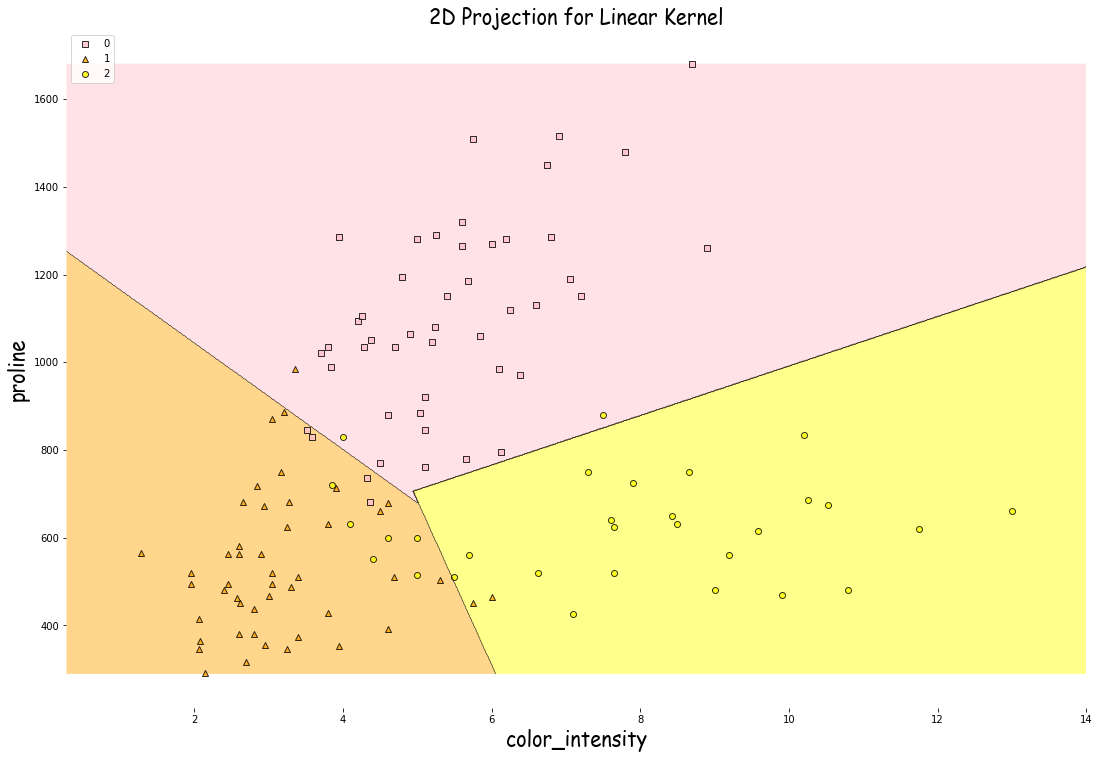

In [7]:
#-----providing figure size for the plot----
plt.figure(figsize=(15,10))
#-----assigning font vlaues in the form a dictionary----
font = {'family': 'Comic Sans MS',
        'color':  'black',
        'weight': 'normal',
        'size': 20,
        }
#-------Plotting the linear kernel svm-----
plot_decision_regions(X=X_train.values, 
                     y=y_train.values,
                     clf=svm_linear, 
                     legend=2,colors='pink,orange,yellow')
#-------Customising the plot by adding title and x vs y label-----
plt.legend(loc='upper left')
plt.tight_layout()
plt.xlabel(selected_attr[0],fontdict=font)
plt.ylabel(selected_attr[1],fontdict=font)
plt.title("2D Projection for Linear Kernel",fontdict=font)
plt.show()

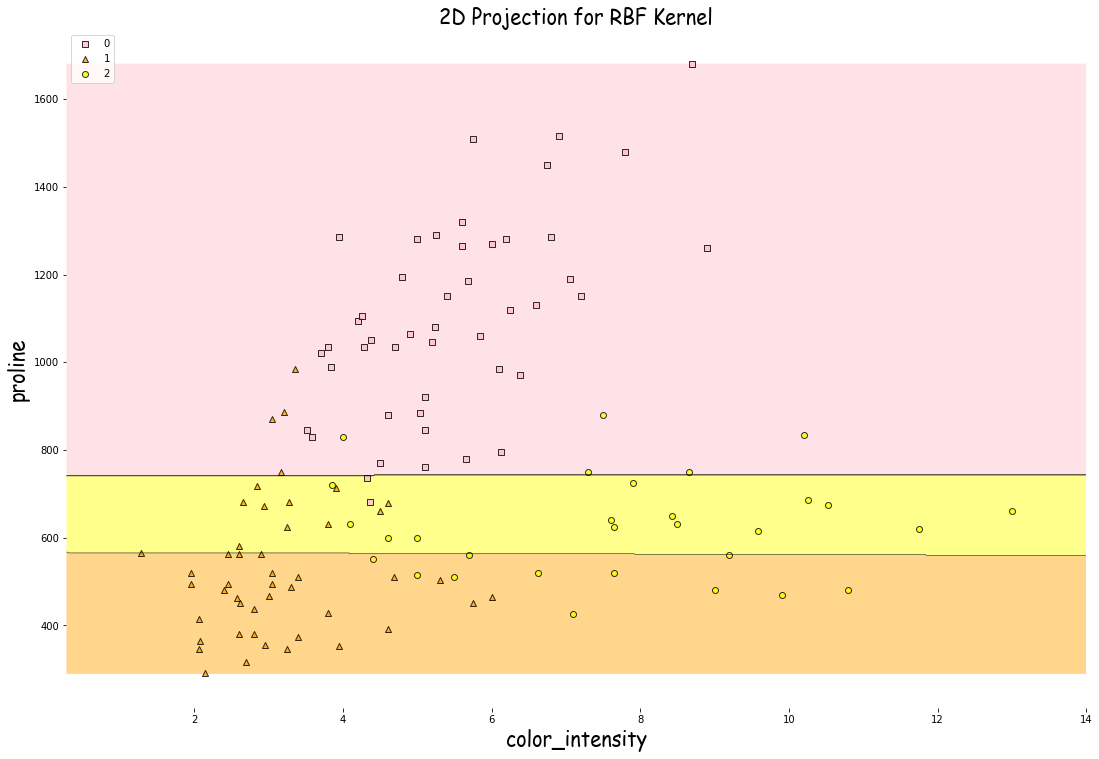

In [8]:
#-----providing figure size for the plot----
plt.figure(figsize=(15,10))
#-----assigning font vlaues in the form a dictionary----
font = {'family': 'Comic Sans MS',
        'color':  'black',
        'weight': 'normal',
        'size': 20,
        }
#-------Plotting the rbf kernel svm-----
plot_decision_regions(X=X_train.values, 
                     y=y_train.values,
                     clf=svm_rbf, 
                     legend=2,colors='pink,orange,yellow')
#-------Customising the plot by adding title and x vs y label-----
plt.legend(loc='upper left')
plt.tight_layout()
plt.xlabel(selected_attr[0],fontdict=font)
plt.ylabel(selected_attr[1],fontdict=font)
plt.title("2D Projection for RBF Kernel",fontdict=font)
plt.show()
plt.show()

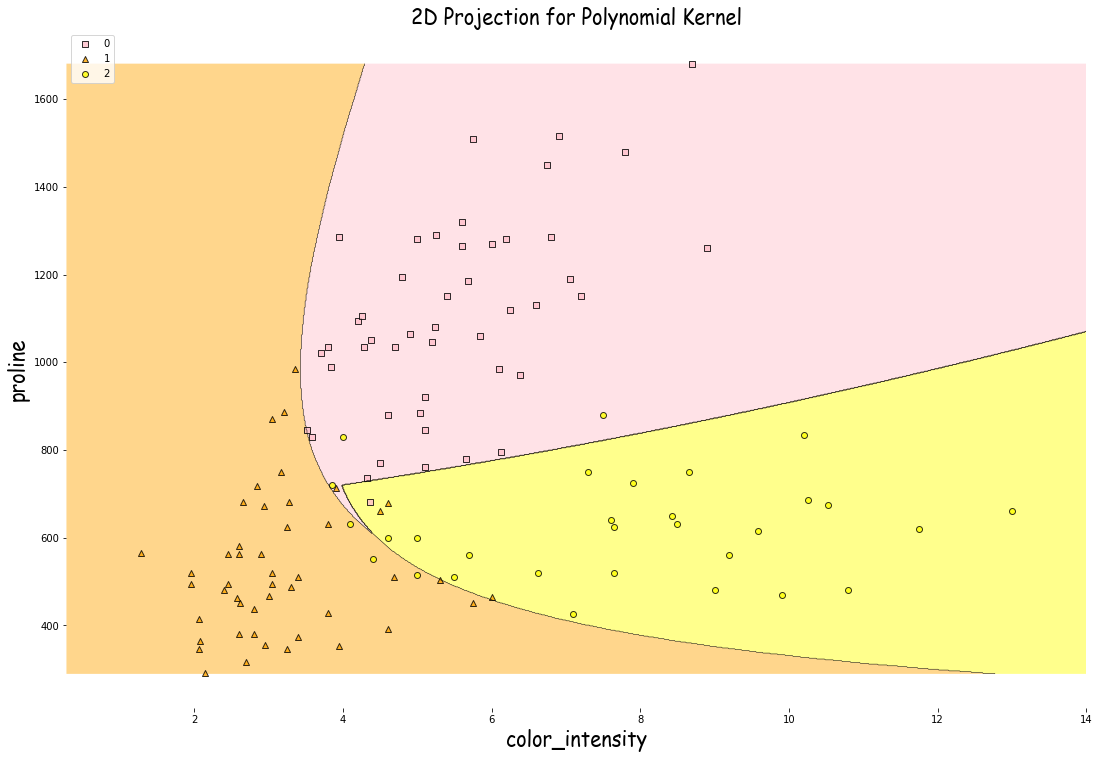

In [9]:
#-----providing figure size for the plot----
plt.figure(figsize=(15,10))
#-----assigning font vlaues in the form a dictionary----
font = {'family': 'Comic Sans MS',
        'color':  'black',
        'weight': 'normal',
        'size': 20,
        }
#-------Plotting the polynomial kernel svm-----
plot_decision_regions(X=X_train.values, 
                     y=y_train.values,
                     clf=svm_poly, 
                     legend=2,colors='pink,orange,yellow')
#-------Customising the plot by adding title and x vs y label-----
plt.legend(loc='upper left')
plt.tight_layout()
plt.xlabel(selected_attr[0],fontdict=font)
plt.ylabel(selected_attr[1],fontdict=font)
plt.title("2D Projection for Polynomial Kernel",fontdict=font)
plt.show()

# REFERENCES

http://scikit-learn.org/stable/modules/svm.html<br>
https://stackabuse.com/implementing-svm-and-kernel-svm-with-pythons-scikit-learn/<br>
https://www.learnopencv.com/svm-using-scikit-learn-in-python/